# Sentence Generation using stochastic graph traversal
## Abhishek Raje:BM22BTECH11002

In [1]:
import sys
from collections import Counter
import matplotlib.pyplot as plt
import string
import os
from collections import defaultdict, Counter
import random
import networkx as nx

In [2]:
def create_histogram(word_counts, top_n=20):
    common_words = word_counts.most_common(top_n)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Most Frequent Words')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [3]:
def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read().lower()  # Case insensitive

In [4]:
def tokenize_text(text):
    return text.split()

In [5]:
def get_top_tokens(following_words, top_n=5):
    if not following_words:
        return None 
    
    word_counts = Counter(following_words)
    most_common = word_counts.most_common(top_n)
    return [word for word, _ in most_common]

In [6]:
def generate_word_counts(file_path):
    text = load_text(file_path)
    tokens = tokenize_text(text)
    word_counts = Counter(tokens)
    
    create_histogram(word_counts, top_n=50)

In [7]:
def create_bigram_graph(bigram_model):
    G = nx.DiGraph()

    for word1, word2_counts in bigram_model.items():
        total_count = sum(word2_counts.values())
        for word2, count in word2_counts.items():
            probability = count / total_count
            G.add_edge(word1, word2, weight=probability)
    
    return G

In [8]:
def visualize_bigram_graph(G, top_n=50):
    top_words = sorted(G.degree, key=lambda x: x[1], reverse=True)[:top_n]
    subgraph = G.subgraph(dict(top_words).keys())

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10)
    
    edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in subgraph.edges(data=True)}
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)
    plt.show()


In [9]:
def predict_next_word(graph, initial_word, num_predictions=5):
 
    neighbors = graph[initial_word]
    sorted_neighbors = sorted(neighbors.items(), key=lambda x: x[1]['weight'], reverse=True)
    
    predictions = [word for word, data in sorted_neighbors[:num_predictions]]
    return predictions

In [10]:
def build_bigram_model(tokens):
    bigram_model = defaultdict(Counter)
    
    for i in range(len(tokens) - 1):
        word1 = tokens[i]
        word2 = tokens[i + 1]
        bigram_model[word1][word2] += 1
    
    return bigram_model

In [11]:
def create_bigram_graph(bigram_model):
    G = nx.DiGraph()

    for word1, word2_counts in bigram_model.items():
        total_count = sum(word2_counts.values())
        for word2, count in word2_counts.items():
            probability = count / total_count
            G.add_edge(word1, word2, weight=probability)
    
    return G


In [12]:
def remove_top_n_tokens(tokens, n=1000):
    word_counts = Counter(tokens)
    most_common_words = set([word for word, _ in word_counts.most_common(n)])
    filtered_tokens = [word for word in tokens if word not in most_common_words]
    
    return filtered_tokens

In [13]:
def traverse_graph(graph, initial_word, num_words=20):

    current_word = initial_word
    generated_sentence = [current_word]
    
    for _ in range(num_words - 1): 
        neighbors = list(graph[current_word].items())
        if not neighbors:
            break
        
        next_words = [word for word, _ in neighbors]
        probabilities = [data['weight'] for _, data in neighbors]
        
        current_word = random.choices(next_words, weights=probabilities, k=1)[0]
        generated_sentence.append(current_word)
    
    return generated_sentence


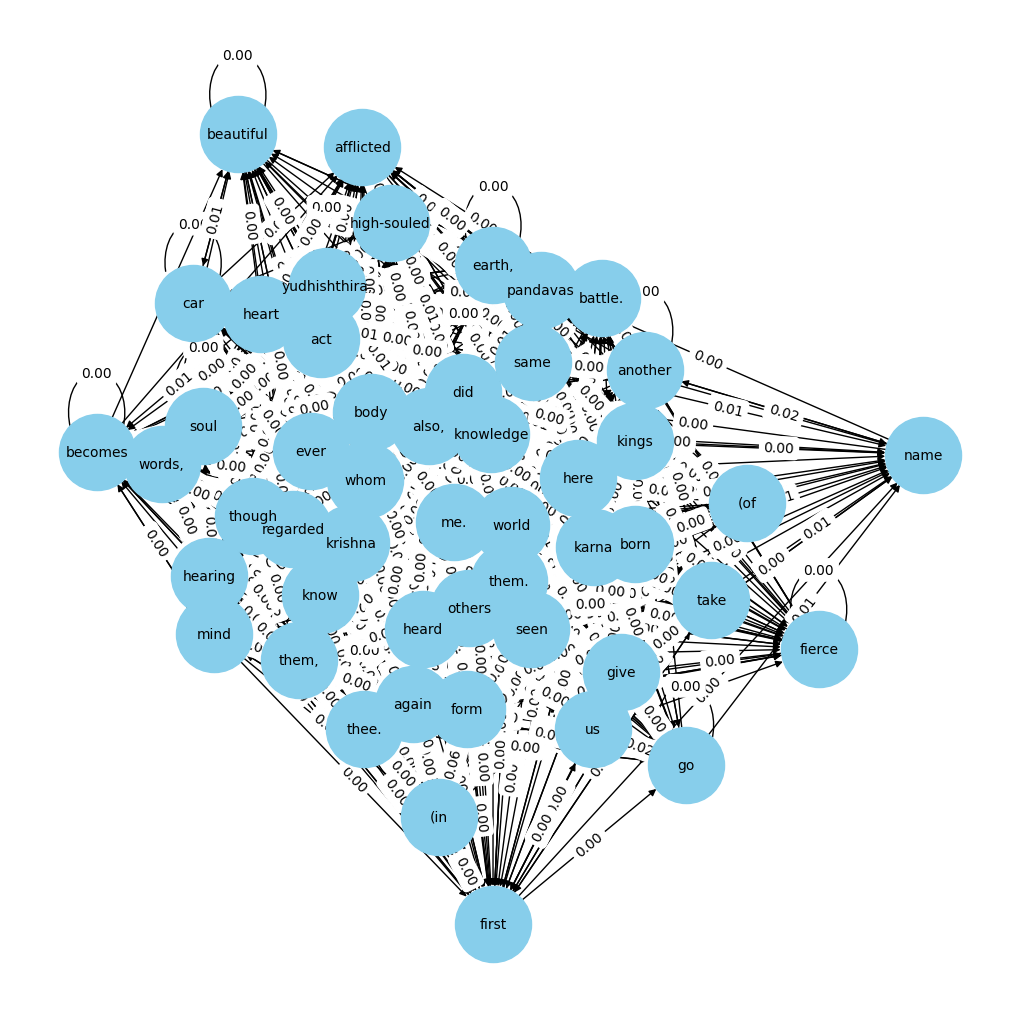

In [47]:
file_path = "/home/abhishek/Documents/workspace/Sem-5/Probabilty_Random_Processs/ChatGPT/Mahabharata_kisari_mohan_ganguly.txt"
initial_words = "the son of krishna"
text = load_text(file_path)
tokens = tokenize_text(text)
    
filtered_tokens = remove_top_n_tokens(tokens, n=200) 
bigram_model = build_bigram_model(filtered_tokens)
bigram_graph = create_bigram_graph(bigram_model)
visualize_bigram_graph(bigram_graph, top_n=50)
initial_word = initial_words.split()[-1] 

In [48]:
### Generating Differnt sentences due to probabiltic traversal

In [49]:
generated_sentence = traverse_graph(bigram_graph, initial_word, num_words=20)    
print("Generated sentence:", " ".join(generated_sentence))

Generated sentence: krishna padmanabha, regenerate classes, committed them. unable acquire knowledge vedanta sankhya scriptures, knowledge, intelligence, studied vedas eat food observant duties


In [50]:
generated_sentence = traverse_graph(bigram_graph, initial_word, num_words=20)    
print("Generated sentence:", " ".join(generated_sentence))

Generated sentence: krishna arjuna? who, under control. regards partha, else able skilful rider sindhus, sinless well-known slay sakuni also, shafts, virata matsyas.


In [51]:
generated_sentence = traverse_graph(bigram_graph, initial_word, num_words=20)    
print("Generated sentence:", " ".join(generated_sentence))

Generated sentence: krishna immeasurable soul, succeeds attaining status austere penances, fragrance blue complexion, wed amiable something way. kriyavatam explained previous originating energy.


In [52]:
generated_sentence = traverse_graph(bigram_graph, initial_word, num_words=20)    
print("Generated sentence:", " ".join(generated_sentence))

Generated sentence: krishna showed least regard victory vasava. congratulated ashvatthama, done deities narada world unseen. separate existence gold regarded righteous? say something
